In [1]:
import pandas as pd
from itertools import product

from utils.static import *
from utils.plots import *

In [2]:
plot = Plot()

In [ ]:
D_p = {}
D_p_edges = {}

M_p = {metric.id : [] for metric in METRICS}
M_p_edges = {e_mes : [] for e_mes in E_MES}

for p in PERTURBATIONS:
    D_p[p] = {}
    D_p_edges[p] = {}
    for (g, w) in product(G_NAME, W_NAME):
        D_p[p][(g, w)] = {}
        D_p_edges[p][(g, w)] = {}
        for m in MODES:
            D_p[p][(g, w)][m] = pd.read_csv(
                f'results/perturbation/{p.name}/{g}/{w.name}/{m}.csv', header = [0,1])
            D_p_edges[p][(g, w)][m] = pd.read_csv(
                f'results/perturbation/{p.name}/{g}/{w.name}/edges {m}.csv', header = [0,1])
            
            for metric in METRICS:
                M_p[metric.id].append(D_p[p][(g, w)][m][metric]['mean'].max())
            for e_mes in E_MES:
                M_p_edges[e_mes].append(D_p_edges[p][(g, w)][m][e_mes]['mean'].max())

for metric in METRICS:
    M_p[metric.id] = pretty_upper_bound(np.max(M_p[metric.id]))
for e_mes in E_MES:
    M_p_edges[e_mes] = pretty_upper_bound(np.max(M_p_edges[e_mes]))

In [ ]:
for w in W_NAME:
    for p in PERTURBATIONS:
        for m in METRICS:
            plot.perturbation(D_p[p], [w], G_NAME, m, p, by = 'weight',
                              y_axis_range=(0, M_p[m.id]))

for g in G_NAME:
    for p in PERTURBATIONS:
        for m in METRICS:
            plot.perturbation(D_p[p], W_NAME, [g], m, p, by = 'graph',
                              y_axis_range=(0, M_p[m.id]))

In [ ]:
for w in W_NAME:
    for p in PERTURBATIONS:
        for e_mes in E_MES:
            plot.perturbation_edges(D_p_edges[p], [w], G_NAME, e_mes, p, by = 'weight',
                                    y_axis_range=(0, M_p_edges[e_mes]))


for g in G_NAME:
    for p in PERTURBATIONS:
        for e_mes in E_MES:
            plot.perturbation_edges(D_p_edges[p], W_NAME, [g], e_mes, p, by = 'graph',
                                    y_axis_range=(0, M_p_edges[e_mes]))

In [7]:
D_g = {}
D_g_edges = {}

M_g = {metric.id : [] for metric in METRICS}
M_g_edges = {e_mes : [] for e_mes in E_MES}

for (g, w) in product(G_NAME, W_NAME):
    D_g[(g, w)] = {}
    D_g_edges[(g, w)] = {}
    for m in MODES:
        D_g[(g, w)][m] = pd.read_csv(
            f'results/gaussian_noise/{g}/{w}/{m}.csv', header = [0,1], index_col=0)
        D_g_edges[(g, w)][m] = pd.read_csv(
            f'results/gaussian_noise/{g}/{w}/edges {m}.csv', header = [0,1], index_col=0)
        
        for metric in METRICS:
            M_g[metric.id].append(D_g[(g, w)][m][metric.id]['mean'].max())
        for e_mes in E_MES:
            M_g_edges[e_mes].append(D_g_edges[(g, w)][m][e_mes]['mean'].max())
            
for metric in METRICS:
    M_g[metric.id] = pretty_upper_bound(np.max(M_g[metric.id]))
for e_mes in E_MES:
    M_g_edges[e_mes] = pretty_upper_bound(np.max(M_g_edges[e_mes]))

In [9]:
for w in W_NAME:
    for m in METRICS:
        plot.gaussian_noise(D_g, [w], G_NAME, m, by = 'weight',
                           y_axis_range = (0, M_g[m.id]))

for g in G_NAME:
    for m in METRICS:
        plot.gaussian_noise(D_g, W_NAME, [g], m, by = 'graph',
                           y_axis_range = (0, M_g[m.id]))

<Figure size 432x288 with 0 Axes>

In [10]:
for w in W_NAME:
    for e_mes in E_MES:
        plot.gaussian_noise_edges(D_g_edges, [w], G_NAME, e_mes, by = 'weight',
                                  y_axis_range = (0, M_g_edges[e_mes]))

for g in G_NAME:
    for e_mes in E_MES:
        plot.gaussian_noise_edges(D_g_edges, W_NAME, [g], e_mes, by = 'graph',
                                  y_axis_range = (0, M_g_edges[e_mes]))

<Figure size 432x288 with 0 Axes>

In [3]:
D_gc = {}
D_gc_labels = {}

for g in G_NAME:
    D_gc_labels[g] = pd.read_csv(
        f'results/clustering/gaussian_noise/{g}/labels.csv')['0'].tolist()

    D_gc[g] = {}
    for m in MODES:
        D_gc[g][m] = pd.read_csv(
            f'results/clustering/gaussian_noise/{g}/{m}.csv')

In [4]:
for g in G_NAME:
    for mode in MODES:
        for metric in METRICS:
            plot.clustering(D_gc[g][mode][metric.id], g, mode, metric, D_gc_labels[g])

C:\Users\Nicol\Documents\EPFL\MA4\Graph sparsification\Code\utils\plots.py:149: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(25, 10))


<Figure size 1800x720 with 0 Axes>

<Figure size 1800x720 with 0 Axes>

<Figure size 1800x720 with 0 Axes>

<Figure size 1800x720 with 0 Axes>

<Figure size 1800x720 with 0 Axes>

<Figure size 1800x720 with 0 Axes>

<Figure size 1800x720 with 0 Axes>

<Figure size 1800x720 with 0 Axes>

<Figure size 1800x720 with 0 Axes>

<Figure size 1800x720 with 0 Axes>

<Figure size 1800x720 with 0 Axes>

<Figure size 1800x720 with 0 Axes>

<Figure size 1800x720 with 0 Axes>

<Figure size 1800x720 with 0 Axes>

<Figure size 1800x720 with 0 Axes>

<Figure size 1800x720 with 0 Axes>

<Figure size 1800x720 with 0 Axes>

<Figure size 1800x720 with 0 Axes>

<Figure size 1800x720 with 0 Axes>

<Figure size 1800x720 with 0 Axes>

<Figure size 1800x720 with 0 Axes>

<Figure size 1800x720 with 0 Axes>

<Figure size 1800x720 with 0 Axes>

<Figure size 1800x720 with 0 Axes>

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from utils.graphs import *

In [2]:
H = ABCD(n = 1000, deg_exp = 5, xi = 0.1)
print(H)

Graph named 'ABCD' with 1000 nodes and 3025 edges


In [33]:
G = Exponential()(H)
apspG = apsp(G)
print(G)
print(apspG)

Graph named 'ABCD' with 1000 nodes and 3025 edges
Graph named 'ABCD' with 1000 nodes and 2149 edges


In [22]:
communities = nx.community.greedy_modularity_communities(G)
pos = nx.fruchterman_reingold_layout(G)

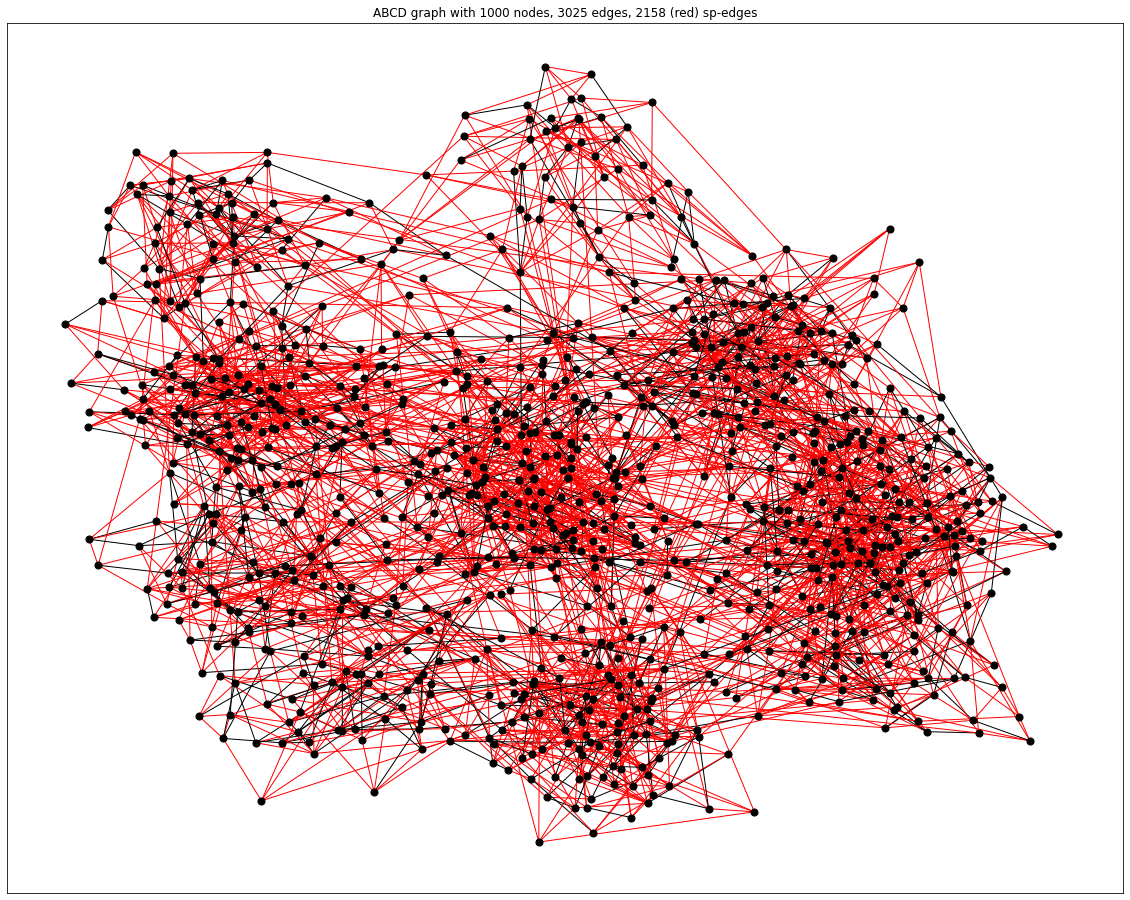

<Figure size 432x288 with 0 Axes>

In [32]:
plt.figure(figsize=(30, 24))

# Draw edges that are part of the All Pair Shortest Path subgraph in red
for u, v, w in G.edges(data=True):
    if w['weight'] >= 0:
        if v in apspG[u]:
            #pass
            nx.draw_networkx_edges(G, pos, edgelist=[(u, v)], edge_color='red')
        else:
            nx.draw_networkx_edges(G, pos, edgelist=[(u, v)], edge_color='black')

nx.draw_networkx_nodes(G, pos, node_size=50, node_color='black')
plt.title('ABCD graph with 1000 nodes, 3025 edges, 2158 (red) sp-edges')
plt.show()
plt.savefig(f'ABCD apsp visualisation.png', dpi=200)